# Analisis Data Eksploratori di Python - Membaca, membersihkan, dan memvalidasi


## DataFrame dan Series


In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nsfg = pd.read_hdf('./dataset/nsfg.hdf5', 'nsfg')

In [3]:
# Menampilkan jumlah baris dan kolom
print(nsfg.shape)

# Menampilkan nama-nama kolom
print(nsfg.columns)

# Memilih kolom birthwgt_oz1: berat dalam ons
ounces = nsfg['birthwgt_oz1']

# Mencetak 5 elemen pertama dari ounces
print(ounces.head(5))

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Membersihkan dan Memvalidasi

### Membersihkan variabel

In [4]:
nsfg['nbrnaliv'].value_counts()

nbrnaliv
1.0    6379
2.0     100
3.0       5
8.0       1
Name: count, dtype: int64

In [5]:
# Mengganti nilai 8 dengan NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Mencetak nilai dan frekuensinya
print(nsfg['nbrnaliv'].value_counts())

nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12976\3082579758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)


### Menghitung variabel

In [6]:
nsfg['agecon'].describe()

count    9358.000000
mean     2446.330199
std       579.392363
min       750.000000
25%      1983.000000
50%      2366.000000
75%      2850.000000
max      4350.000000
Name: agecon, dtype: float64

In [7]:
nsfg['agepreg'].describe()

count    9109.000000
mean     2494.934570
std       578.099231
min       825.000000
25%      2041.000000
50%      2416.000000
75%      2900.000000
max      4350.000000
Name: agepreg, dtype: float64

In [8]:
# Memilih kolom dan membagi dengan 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Menghitung selisih
preg_length = agepreg - agecon

# Menghitung statistik ringkasan
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Filter dan Visualisasi

### Membuat histogram

Text(0, 0.5, 'Jumlah kehamilan')

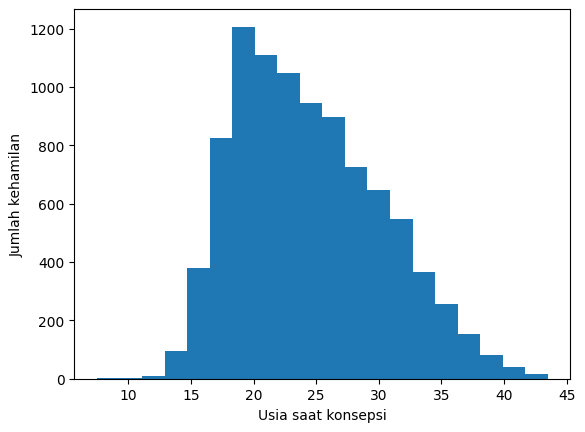

In [9]:
# Membuat histogram
plt.hist(agecon, bins=20)

# Memberi label pada sumbu
plt.xlabel("Usia saat konsepsi")
plt.ylabel('Jumlah kehamilan')

Text(0, 0.5, 'Jumlah kehamilan')

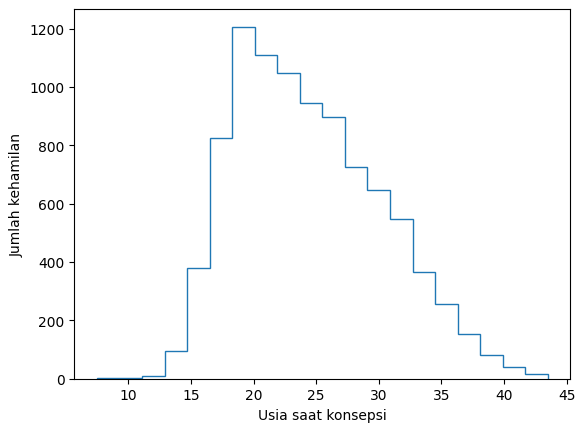

In [10]:
# Membuat histogram
plt.hist(agecon, bins=20, histtype='step')

# Memberi label pada sumbu
plt.xlabel("Usia saat konsepsi")
plt.ylabel('Jumlah kehamilan')

### Menghitung berat lahir

In [11]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    # Fungsi untuk melakukan resampling baris dengan pembobotan
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [12]:
# Melakukan resampling data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Membersihkan variabel berat
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Menghitung total berat lahir
birth_weight = pounds + ounces/16

In [13]:
# Membuat Series Boolean untuk bayi cukup bulan
full_term = nsfg['prglngth'] >= 37

# Memilih berat bayi cukup bulan
full_term_weight = birth_weight[full_term]

# Menghitung rata-rata berat bayi cukup bulan
print(full_term_weight.mean())

7.420095367847411


### Filter

In [14]:
# Filter bayi cukup bulan
full_term = nsfg['prglngth'] >= 37

# Filter kelahiran tunggal
single = nsfg['nbrnaliv'] == 1

# Menghitung berat lahir untuk bayi tunggal cukup bulan
single_full_term_weight = birth_weight[single & full_term]
print('Rata-rata berat bayi tunggal cukup bulan:', single_full_term_weight.mean())

# Menghitung berat lahir untuk bayi kembar cukup bulan
mult_full_term_weight = birth_weight[~single & full_term]
print('Rata-rata berat bayi kembar cukup bulan:', mult_full_term_weight.mean())

Rata-rata berat bayi tunggal cukup bulan: 7.429718921389397
Rata-rata berat bayi kembar cukup bulan: 5.916071428571429


# Analisis Data Eksploratori di Python - Hubungan


## Mengeksplorasi hubungan


In [15]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [16]:
brfss_original = pd.read_hdf('./dataset/brfss.hdf5', 'brfss')

### PMF usia

Text(0, 0.5, 'PMF')

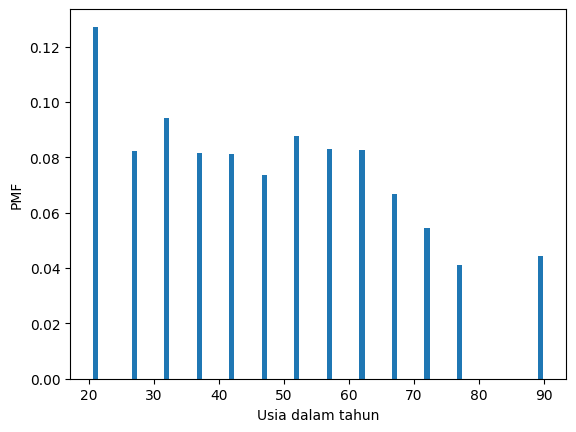

In [17]:
# Ekstrak usia
age = Pmf.from_seq(brfss_original['AGE'])

# Membuat plot PMF
age.bar()

# Memberi label pada sumbu
plt.xlabel('Usia dalam tahun')
plt.ylabel('PMF')

### Plot sebaran

Text(0, 0.5, 'Berat dalam kg')

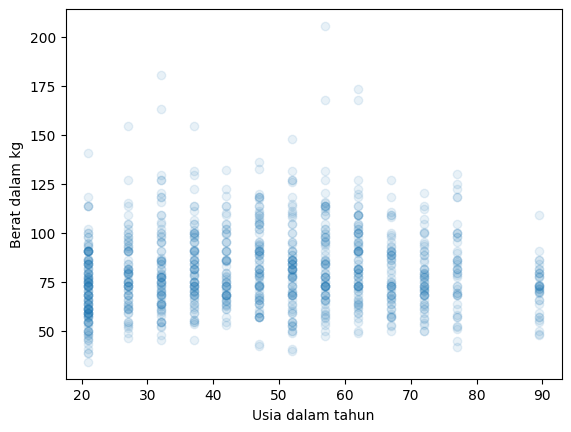

In [18]:
# Memilih 1000 responden pertama
brfss = brfss_original[:1000]

# Ekstrak usia dan berat
age = brfss['AGE']
weight = brfss['WTKG3']

# Membuat plot sebaran
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Usia dalam tahun')
plt.ylabel('Berat dalam kg')


### Jittering (Penambahan noise)

Text(0, 0.5, 'Berat dalam kg')

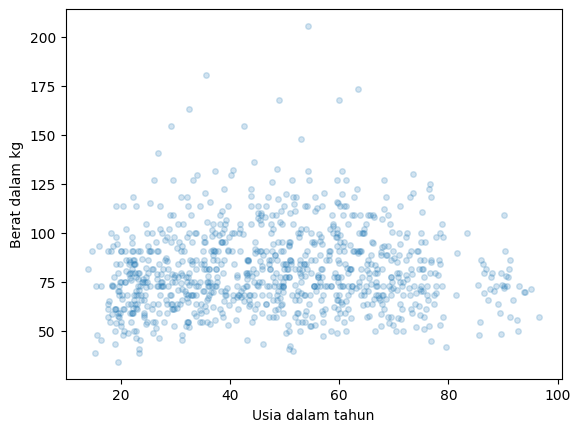

In [19]:
# Memilih 1000 responden pertama
brfss = brfss_original[:1000]

# Menambahkan jittering pada usia
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Ekstrak berat
weight = brfss['WTKG3']

# Membuat plot sebaran
plt.plot(age, weight, 'o', markersize=4, alpha=0.2)

plt.xlabel('Usia dalam tahun')
plt.ylabel('Berat dalam kg')

## Visualisasi hubungan


### Tinggi dan berat


Text(0, 0.5, 'Berat dalam kg')

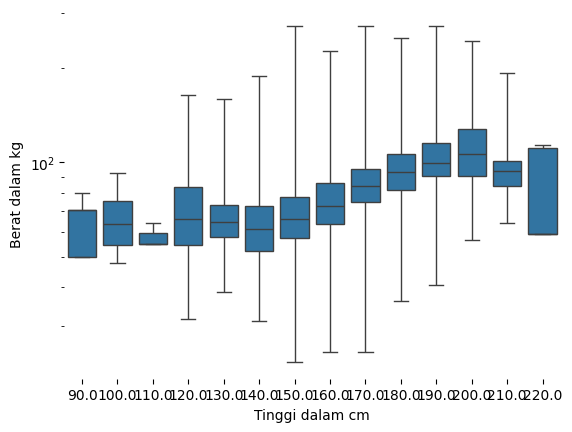

In [20]:
# Menghapus baris dengan data yang hilang
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Membuat box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot sumbu y dalam skala logaritmik
plt.yscale('log')

# Menghapus garis yang tidak diperlukan dan memberi label sumbu
sns.despine(left=True, bottom=True)
plt.xlabel('Tinggi dalam cm')
plt.ylabel('Berat dalam kg')

### Distribusi pendapatan

Text(0, 0.5, 'PMF')

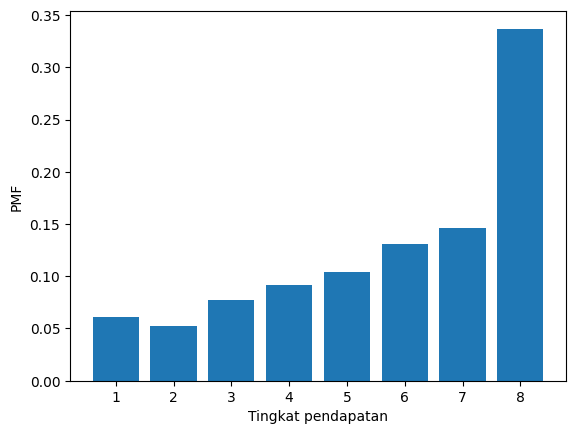

In [21]:
# Ekstrak pendapatan
income = brfss_original['INCOME2']

# Plot PMF
Pmf.from_seq(income).bar()

# Memberi label pada sumbu
plt.xlabel('Tingkat pendapatan')
plt.ylabel('PMF')

### Pendapatan dan tinggi

Text(0, 0.5, 'Tinggi dalam cm')

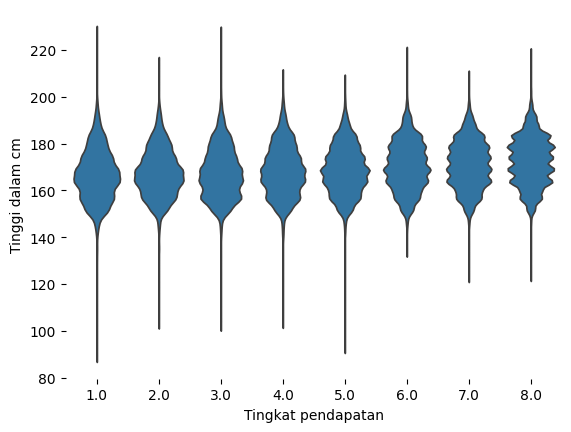

In [22]:
# Menghapus baris dengan data yang hilang
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Membuat violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Menghapus garis yang tidak diperlukan dan memberi label sumbu
sns.despine(left=True, bottom=True)
plt.xlabel('Tingkat pendapatan')
plt.ylabel('Tinggi dalam cm')

## Korelasi

### Menghitung korelasi


In [23]:
# Memilih kolom
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Menghitung matriks korelasi
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## Regresi sederhana

### Pendapatan dan konsumsi sayuran

In [24]:
from scipy.stats import linregress

In [25]:
# Ekstrak variabel
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Menghitung regresi linear
res = linregress(xs, ys)
print(res)

LinregressResult(slope=np.float64(0.0698804809210502), intercept=np.float64(1.5287786243363106), rvalue=np.float64(0.11967005884864103), pvalue=np.float64(1.3785039162482425e-238), stderr=np.float64(0.0021109763563323335), intercept_stderr=np.float64(0.013196467544093609))


### Memasang garis

(0.0, 6.0)

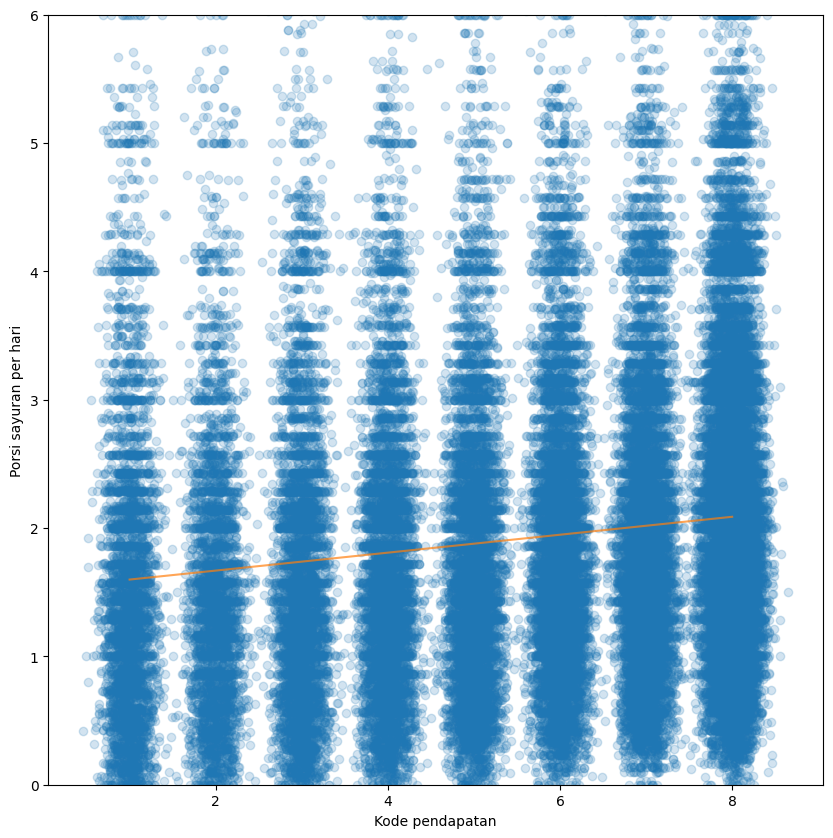

In [26]:
plt.figure(figsize=(10, 10))
# Membuat plot sebaran
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot garis regresi terbaik
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Kode pendapatan')
plt.ylabel('Porsi sayuran per hari')
plt.ylim([0, 6])